<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/II.%20Introduccion_Ciencia_Datos/10_CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNNs aplicadas en CIFAR**

- Problema de clasificación de imágenes con CNNs
- Las CNNs aprovecharán mejor la información espacial de las imágenes vienen en tensores de 32 x 32 x 3 (canales).

Utils

In [ ]:
import matplotlib.pyplot as plt


def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()


def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

In [ ]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets

## Parámetros

In [ ]:
NUM_CLASSES = 10

## **Preparación de los datos**

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

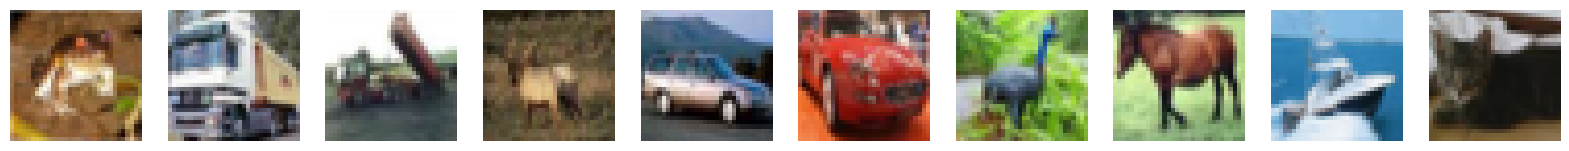

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
display(x_train[:10])
print(y_train[:10])

## **Construcción del Modelo**

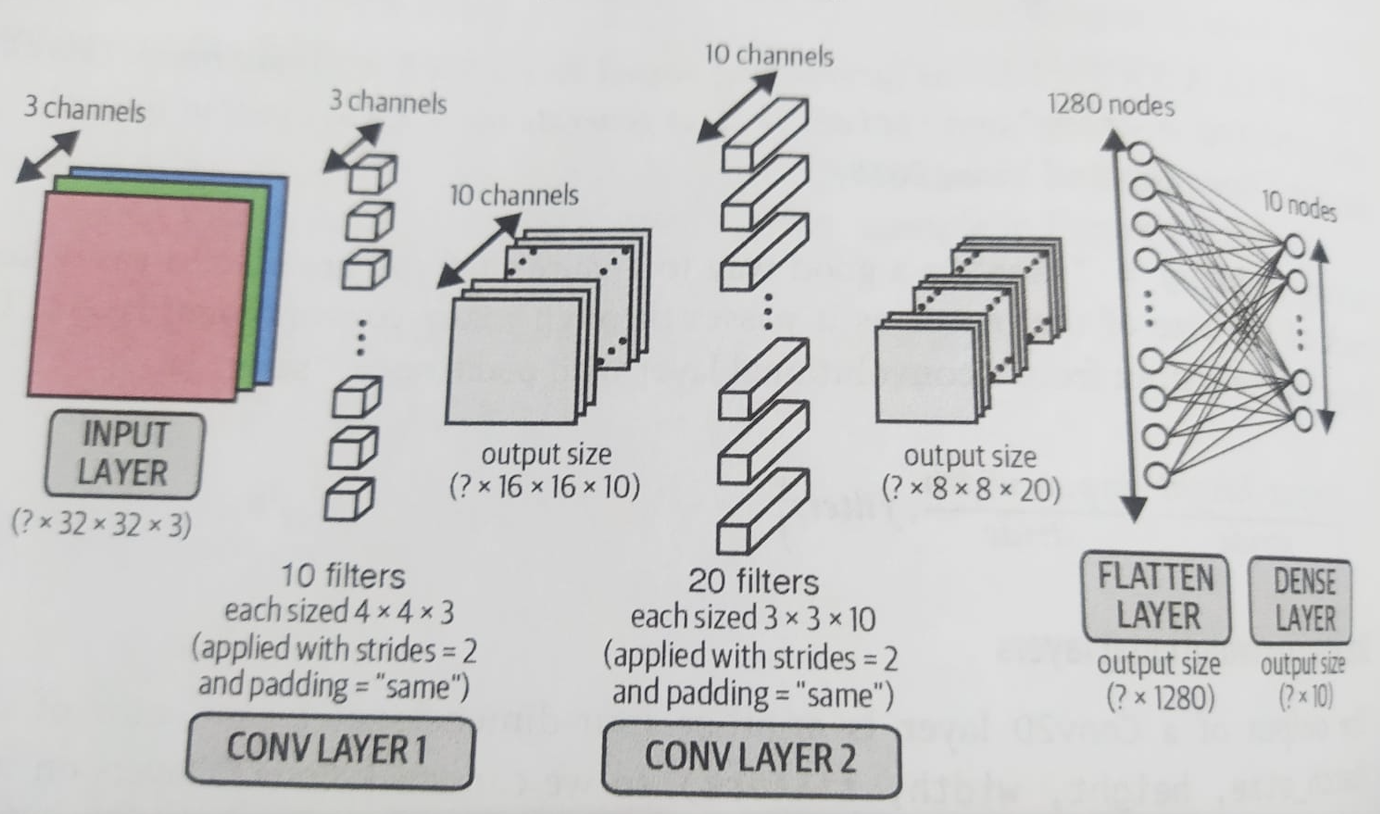

In [ ]:
input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same',
    )(input_layer)
conv_layer_2 = layers.Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same',
    )(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units = 10, activation='softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

**Convoluciones**
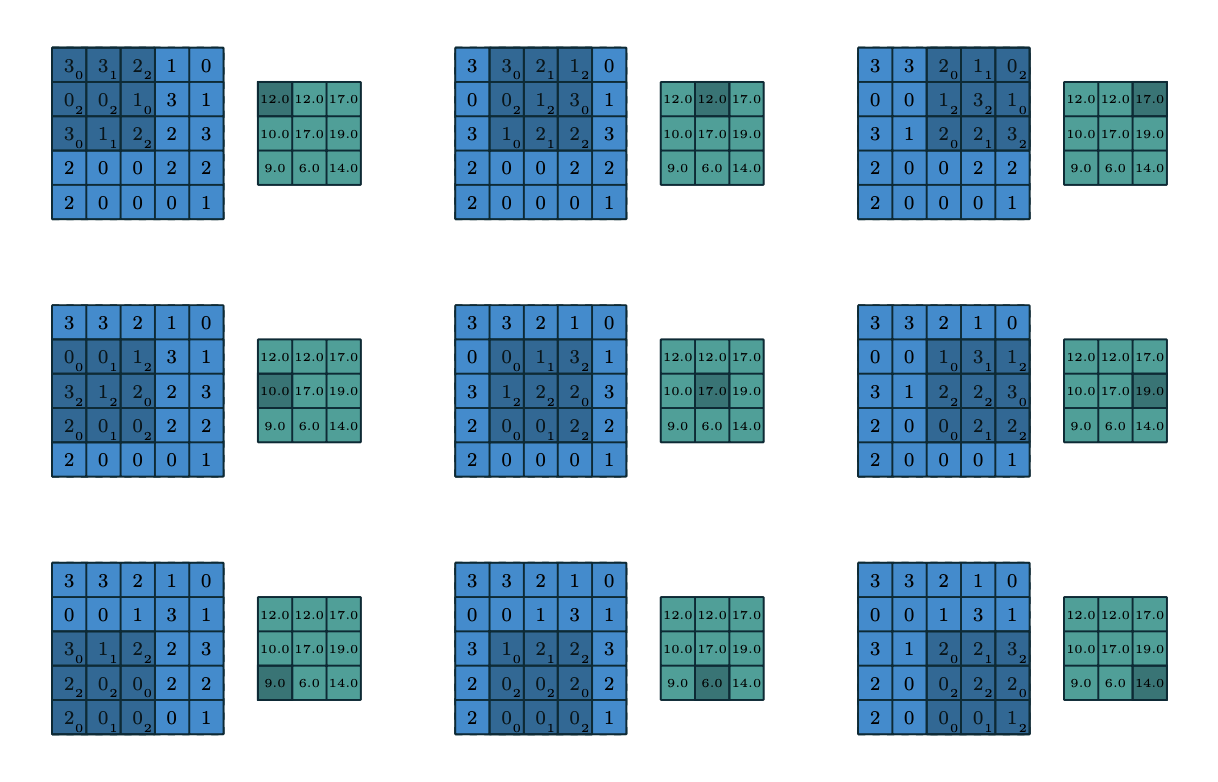


**Padding (same)**

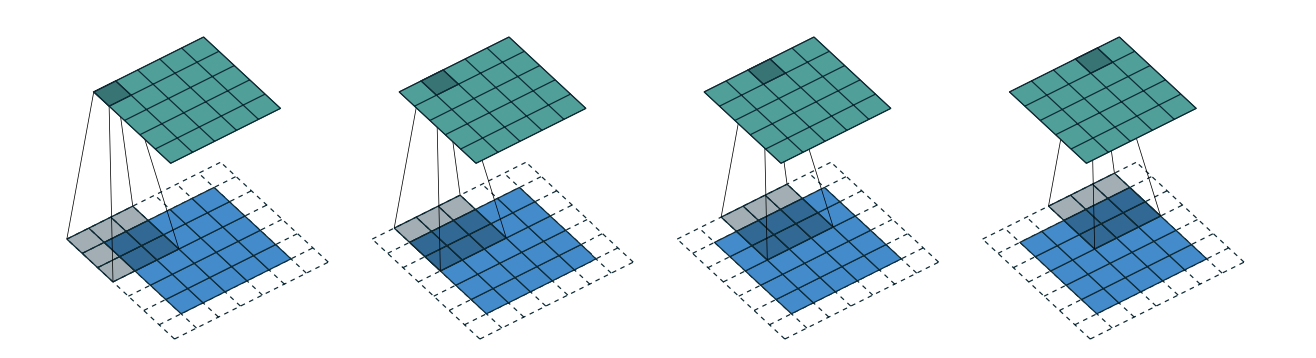

In [ ]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Capas**
- La capa de entrada es (None, 32,32,3). None indica que aún no sabemos cuantas imágenes serán enviadas (batch).
- Las dimensiones de los filtros de la primera capa convolucional son 4x4x3. Dado que hay 3 canales de entrada y los filtros tienen dimensión 4x4.
- El número de parámetros en esta capa es $(4x4x3 +1)x10 = 490$. El +1 es término de bias de cada filtro.
- El resultado de la aplicación de cada filtro de (4x4x3), con strides = 2 y padding = 'same', hace que el mapa resulante sea 16 x 16 (la mitad de su valor original). Al haber 10 filtros el tensor resultante es [16,16,10].
- En la segunda capa convolucional los filtros son de 3x3, con profundidad de 10 (para hacer match con los canales de la capa previa). El número de parámetros es $(3x3x10+1)x20=1280$. Al usar stride=2 y padding = 'same', el mapa resultante será (None, 8,8,20).
- Después de aplica una capa Flatten que resulta en $(8x8x20) = 1280$ unidades. Las cuales despues se conectan con la capa densa que tiene 10 unidades de salida.



## **Entrenamiento del Modelo**
-
-

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.8392 - accuracy: 0.3552 - val_loss: 1.7566 - val_accuracy: 0.3875
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7365 - accuracy: 0.4020 - val_loss: 1.7187 - val_accuracy: 0.4099
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7188 - accuracy: 0.4132 - val_loss: 1.7160 - val_accuracy: 0.4094
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7061 - accuracy: 0.4172 - val_loss: 1.7270 - val_accuracy: 0.4014
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6999 - accuracy: 0.4209 - val_loss: 1.7211 - val_accuracy: 0.4015
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6940 - accuracy: 0.4246 - val_loss: 1.7160 - val_accuracy: 0.4102
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6875 - accuracy: 0.4262 - val_loss: 1.7114 - val_accuracy

## **Evaluación**

In [ ]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 11ms/step - loss: 1.7198 - accuracy: 0.4084


[1.7197602987289429, 0.4083999991416931]

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


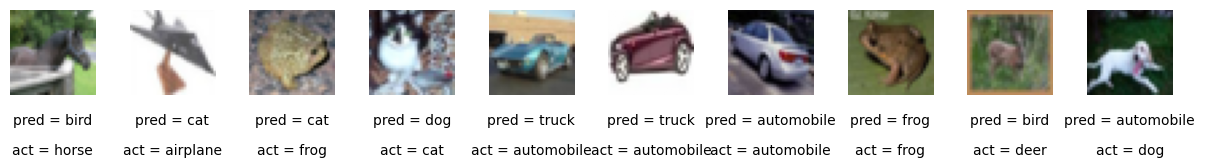

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

## **Mejor Modelo**

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)
